In [1]:
import numpy as np
import glob
import ast
from matplotlib import pyplot as plt

In [26]:
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8

In [16]:
# Open the file (replace 'your_file.txt' with the actual file name)
def get_packed_counts(fname = 'mcts_box_pusher/mcts_9.txt'): 
    with open(fname, 'r') as file:
        # Initialize a list to keep track of 'r' counts
        packed_counts = []

        # Read each line in the file one by one
        for line in file:
            # Check if 'time=30' is in the line
            if 'time=30' in line:
                # Find the 'packed=x' part
                start = line.find('packed=') + len('packed=')
                end = line[start:].find(',')
                # Extract the number for 'x' and add it to the list
                packed_count = int(line[start:start+end])
                packed_counts.append(packed_count)

    # Print or return the list of 'packed' counts
    return np.array(packed_counts)

def get_creward(fname = 'mcts_box_pusher/mcts_9.txt'): 
    with open(fname, 'r') as file:
        # Initialize a list to keep track of 'packed' counts
        lines = file.readlines()

    return np.array(ast.literal_eval(lines[-1])[0])


In [19]:
bl5_packed  = get_packed_counts(fname = 'problems/results/mcts.txt')
bl9_packed  = get_packed_counts(fname = 'problems/results/mcts_9.txt')
bl13_packed  = get_packed_counts(fname = 'problems/results/mcts_13.txt')
mcts_random_sim_packed  = get_packed_counts(fname = 'problems/results/mcts_random_sim.txt')
random_act_packed  = get_packed_counts(fname = 'problems/results/random_actions.txt')
greedy_act_packed = get_packed_counts(fname = 'problems/results/greedy_actions.txt')

In [20]:
print(np.mean(bl5_packed))
print(np.mean(bl9_packed))
print(np.mean(bl13_packed))
print(np.mean(mcts_random_sim_packed))
print(np.mean(random_act_packed))
print(np.mean(greedy_act_packed))

10.26
10.08
9.46
9.22
0.3
8.28


In [21]:
bl5_r  = get_creward(fname = 'problems/results/mcts.txt')
bl9_r  = get_creward(fname = 'problems/results/mcts_9.txt')
bl13_r  = get_creward(fname = 'problems/results/mcts_13.txt')
mcts_random_sim_r  = get_creward(fname = 'problems/results/mcts_random_sim.txt')
random_act_r  = get_creward(fname = 'problems/results/random_actions.txt')
greedy_act_r  = get_creward(fname = 'problems/results/greedy_actions.txt')

In [22]:
print(np.mean(bl5_r))
print(np.mean(bl9_r))
print(np.mean(bl13_r))
print(np.mean(mcts_random_sim_r))
print(np.mean(random_act_r))
print(np.mean(greedy_act_r))

52.752521419031275
50.59554612108994
46.5296612939473
44.84446260933319
-28.25526206013687
34.76819057584075


In [23]:
bl_comparison_r = np.array([bl5_r,bl9_r,bl13_r])
bl_comparison_packed = np.array([bl5_packed,bl9_packed,bl13_packed])

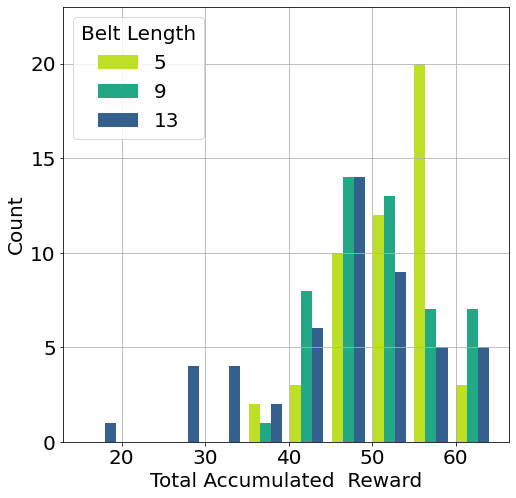

In [ ]:
bins = plt.hist([bl5_r,bl9_r,bl13_r],color= [plt.cm.viridis_r(0.1), plt.cm.viridis_r(0.4),plt.cm.viridis_r(0.7) ],bins=10)
plt.legend(bins[2], ['5','9','13'], title = 'Belt Length')
plt.grid()
plt.xlabel('Total Accumulated Reward')
plt.ylabel('Count')
plt.ylim(0,23)
plt.show()



Text(0.5, 0, 'Belt Length')

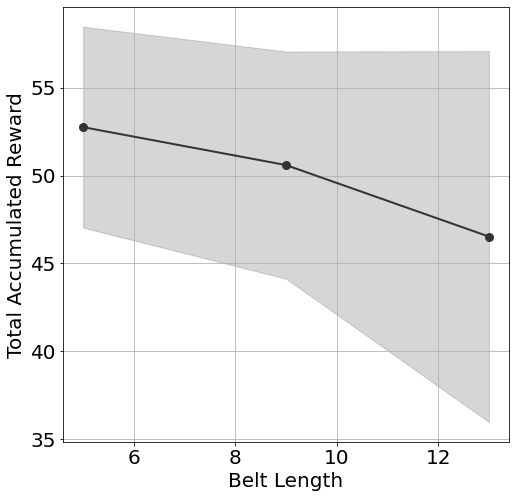

In [134]:
plt.figure()
means = bl_comparison_r.mean(axis=1)
stds = bl_comparison_r.std(axis=1)
plt.plot([5,9,13], means, 'o-',c = '0.2')
plt.fill_between([5,9,13], means - stds, means+stds, alpha = 0.2, color='0.2')
plt.grid()
plt.ylabel('Total Accumulated Reward')
plt.xlabel('Belt Length')

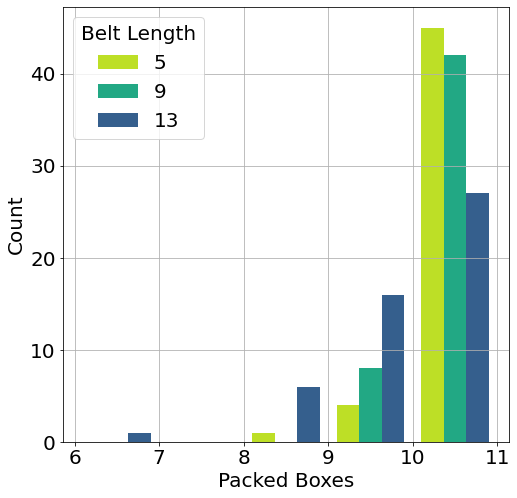

In [84]:
bins = plt.hist([bl5_packed,bl9_packed,bl13_packed],color= [plt.cm.viridis_r(0.1), plt.cm.viridis_r(0.4),plt.cm.viridis_r(0.7) ],bins=5,align='mid')
plt.legend(bins[2], ['5','9','13'], title = 'Belt Length')
plt.grid()
plt.xlabel('Packed Boxes')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Belt Length')

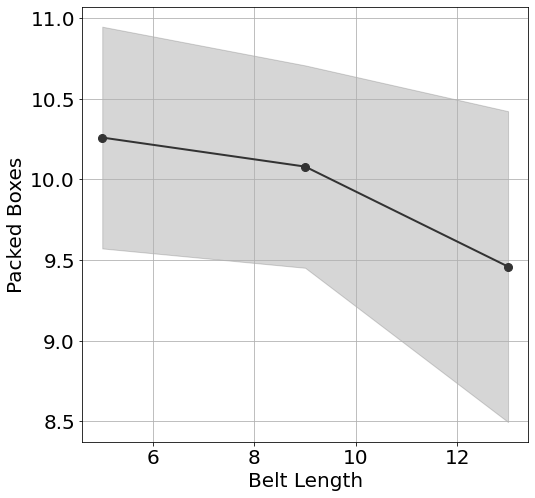

In [136]:
plt.figure()
means = bl_comparison_packed.mean(axis=1)
stds = bl_comparison_packed.std(axis=1)
plt.plot([5,9,13], means, 'o-',c = '0.2')
plt.fill_between([5,9,13], means - stds, means+stds, alpha = 0.2, color='0.2')
plt.grid()
plt.ylabel('Packed Boxes')
plt.xlabel('Belt Length')

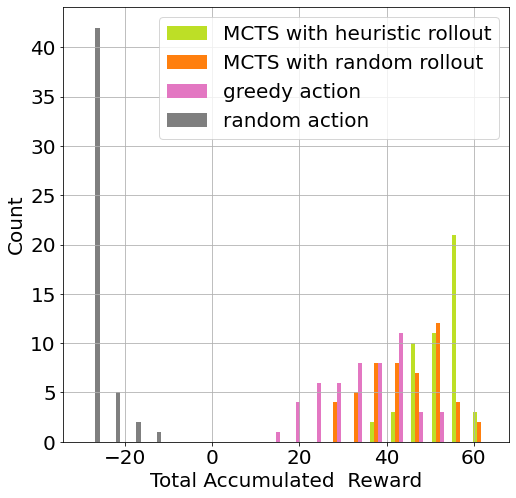

In [27]:
bins = plt.hist([bl5_r,mcts_random_sim_r,greedy_act_r,random_act_r],color= [plt.cm.viridis_r(0.1), plt.cm.tab10(1),plt.cm.tab10(6), plt.cm.tab10(7) ],bins=20)
plt.legend(bins[2], ['MCTS with heuristic rollout','MCTS with random rollout','greedy action','random action'])
plt.grid()
plt.xlabel('Total Accumulated  Reward')
plt.ylabel('Count')
plt.show()

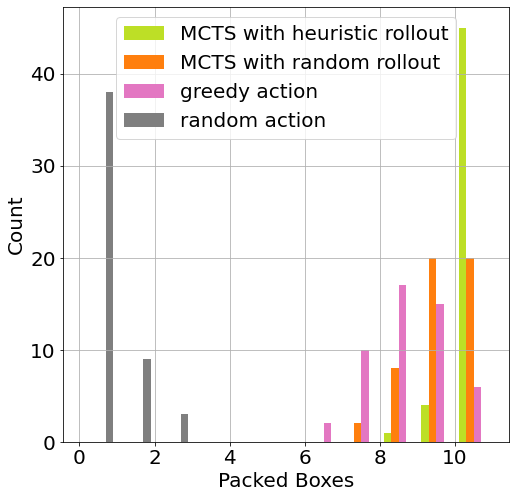

In [28]:
bins = plt.hist([bl5_packed,mcts_random_sim_packed,greedy_act_packed,random_act_packed],color= [plt.cm.viridis_r(0.1), plt.cm.tab10(1),plt.cm.tab10(6), plt.cm.tab10(7) ],bins=11)
plt.legend(bins[2], ['MCTS with heuristic rollout','MCTS with random rollout','greedy action','random action'])
plt.grid()
plt.xlabel('Packed Boxes')
plt.ylabel('Count')
plt.show()

In [29]:

from scipy import stats as st
def confidence_interval_95(data):
    """
    Compute the 95% confidence interval for a given list of values.

    Parameters:
    - data (list or np.array): The data for which the confidence interval is computed.

    Returns:
    - tuple: The mean and the margin of error.
    """
    mean = np.mean(data)
    sem = st.sem(data)  # Standard Error of Mean
    ci = st.t.interval(0.95, len(data)-1, loc=mean, scale=sem)  # for t-distribution
    margin_of_error = (ci[1] - ci[0]) / 2
    return mean, margin_of_error


heuristic = [47.09791527107951, 57.06578821466435, 57.06578821466435, 49.44895403741063, 49.94419213264872, 52.52400991834886, 63.72483267262186, 46.40504444458799, 57.06578821466435, 49.54225445679801, 57.06578821466435, 41.46669347778677, 56.19464483898377, 48.37752546598206, 52.52400991834886, 56.122805758524, 45.777525465982045, 52.52400991834886, 47.77752546598205, 57.06578821466435, 54.56578821466435, 57.06578821466435, 35.994766567930796, 57.06578821466435, 56.30429396179079, 55.600590258087095, 57.06578821466435, 52.060065148521744, 52.52400991834886, 53.42780354822945, 55.42836131407956, 63.24406344185263, 57.06578821466435, 49.2707931178704, 57.06578821466435, 38.72310724282123, 56.2262989147555, 49.53943022788681, 44.444192132648716, 47.77752546598205, 53.839873504417056, 57.06578821466435, 52.52400991834886, 57.06578821466435, 42.87752546598205, 53.454677103553244, 52.52400991834886, 54.55306234740129, 57.06578821466435, 61.41463318397212]

random_sim = [36.82940834912233, 51.45258134692028, 52.88454807300466, 48.076528218732705, 42.87656766157401, 30.058911788035775, 45.61085879931538, 37.866234838687156, 53.60437813687497, 53.19671111125466, 50.37153042902728, 63.910730108519296, 32.593476794150526, 50.1177852062418, 28.66383318354717, 47.857343251682195, 44.59664100068759, 56.707574501913456, 63.496504529001356, 28.269639757384432, 43.60941303257727, 35.16271484772118, 45.12070729387153, 41.26666071028774, 50.98771991088416, 38.233570462694445, 43.86501371209099, 55.783736932613074, 50.02467757763721, 27.292891515343836, 32.654171347798375, 48.482730647274195, 38.5135135616778, 45.69726887710477, 52.45508761258444, 36.737056886308075, 34.91352559639747, 36.544458849669795, 57.55323000963988, 50.36806179122603, 43.21085879931538, 50.93513306417965, 35.40437373349772, 48.60244129089787, 38.901762465594096, 44.58282850599275, 51.45411933770313, 58.44420497670182, 36.959760938884926, 49.41964909281334]

mean_val, moe = confidence_interval_95(bl5_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}")

mean_val, moe = confidence_interval_95(bl9_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}") 


mean_val, moe = confidence_interval_95(bl13_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}") 

mean_val, moe = confidence_interval_95(mcts_random_sim_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}") 

mean_val, moe = confidence_interval_95(random_act_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}") 

mean_val, moe = confidence_interval_95(greedy_act_r)
print(f"95% Confidence Interval: {mean_val:.2f} ± {moe:.2f}") 


95% Confidence Interval: 52.75 ± 1.64
95% Confidence Interval: 50.60 ± 1.85
95% Confidence Interval: 46.53 ± 3.03
95% Confidence Interval: 44.84 ± 2.58
95% Confidence Interval: -28.26 ± 1.08
95% Confidence Interval: 34.77 ± 2.68
